In [1]:
# Run the notebook as if it's in the PROJECT directory
%bookmark PROJ_ROOT /reg/data/ana03/scratch/cwang31/spi
%cd -b PROJ_ROOT

(bookmark:PROJ_ROOT) -> /reg/data/ana03/scratch/cwang31/spi
/reg/data/ana03/scratch/cwang31/spi


In [2]:
import numpy as np
import pickle
import os
import torch
from deepprojection.utils import ConfusionMatrix

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.transforms as transforms
%matplotlib inline

In [4]:
def config_fonts():
    # Where to load external font...
    drc_py    = '.'
    drc_font  = os.path.join("fonts", "Helvetica")
    fl_ttf    = f"Helvetica.ttf"
    path_font = os.path.join(drc_py, drc_font, fl_ttf)
    prop_font = font_manager.FontProperties( fname = path_font )

    # Add Font and configure font properties
    font_manager.fontManager.addfont(path_font)
    prop_font = font_manager.FontProperties(fname = path_font)

    # Specify fonts for pyplot...
    plt.rcParams['font.family'] = prop_font.get_name()
    plt.rcParams['font.size']   = 14

    return None

config_fonts()

In [5]:
drc_pickle = "confusion_matrix"

In [6]:
# Define color schemes...
rgb2hex = lambda r, g, b: '#%02x%02x%02x' % (r, g, b)

scenario_to_color_dict = {
    '01-shot' : rgb2hex( 78, 129, 183),
    '05-shot' : rgb2hex(244, 148,  69),
    '10-shot' : rgb2hex( 90, 164,  78),
    '15-shot' : rgb2hex(195,  55,  43),
    '20-shot' : rgb2hex(135,  97, 179),
}

### Distribution of mean distance in different few-shot learning scenarios

In [7]:
timestamp = "2023_0101_0856_44"
epoch     = 71
scale_exponent = 0
max_num_support = 5

scale_exponent = 0
photon_scale = 10 ** scale_exponent

In [10]:
pdb = "6WM3"
# pdb = "6YN1"
# pdb = '6N38'
pdb = '4B2Q'
# pdb = '3DG5'


max_num_support = 5
fl_pickle1 = f"hit_to_dist_dict.{pdb}.{timestamp}.epoch_{epoch}.seed_0.support_{max_num_support}.scale_{photon_scale}.mean_dist.pickle"

max_num_support = 20
fl_pickle2 = f"hit_to_dist_dict.{pdb}.{timestamp}.epoch_{epoch}.seed_0.support_{max_num_support}.scale_{photon_scale}.mean_dist.pickle"

path_pickle1 = os.path.join(drc_pickle, fl_pickle1)
with open(path_pickle1, 'rb') as handle:
    hit_to_dist_dict1 = pickle.load(handle)

path_pickle2 = os.path.join(drc_pickle, fl_pickle2)
with open(path_pickle2, 'rb') as handle:
    hit_to_dist_dict2 = pickle.load(handle)

In [11]:
# Mean
mean_support_val_dict1 = {}
mean_support_val_dict2 = {}
for hit in [1, 2]:
    mean_support_val = hit_to_dist_dict1[hit].mean(dim = -1)
    mean_support_val_dict1[hit] = mean_support_val
    
    mean_support_val = hit_to_dist_dict2[hit].mean(dim = -1)
    mean_support_val_dict2[hit] = mean_support_val

Text(0.5, 0.5, 'Multi-hit')

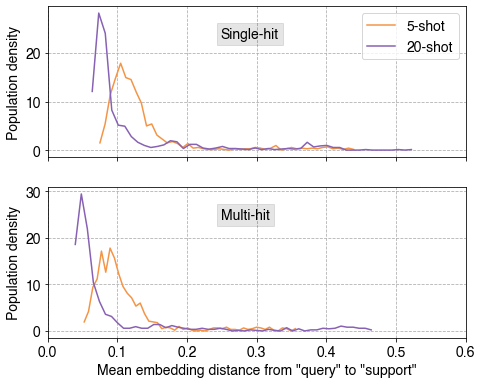

In [12]:
nrows, ncols = 2, 1
fig = plt.figure(figsize = (8.5, 6.1))

gspec = fig.add_gridspec( nrows, ncols,
                          width_ratios  = [1],
                          height_ratios = [1, 1],
                        )
ax_list = [ fig.add_subplot(gspec[i, 0]) for i in range(nrows) ]


# Upper panel - Accuracy...
ax = ax_list[0]

hy, hx = np.histogram(mean_support_val_dict1[1].numpy().reshape(-1), bins = 50, density = True)
ax.plot(hx[:-1], hy, '-', color = scenario_to_color_dict["05-shot"], label = "5-shot")

hy, hx = np.histogram(mean_support_val_dict2[1].numpy().reshape(-1), bins = 50, density = True)
ax.plot(hx[:-1], hy, '-', color = scenario_to_color_dict["20-shot"], label = "20-shot")

ax.set_ylabel('Population density')
ax.legend()
ax.set_xlim((0.0, 0.6))
# ax.set_ylim((0.0, 20))
# ax.set_yticks(np.arange(0.4, 1.0+0.1, 0.1))
ax.grid(True, linestyle = '--')
ax.set_box_aspect((5.7/2)/7.9)    # height/width

for ticklabel in ax.xaxis.get_ticklabels():
    ticklabel.set_visible(False)

offset = transforms.ScaledTranslation(-0.5, 0.6, fig.dpi_scale_trans)
ax.text(0.5, 0.5, "Single-hit", transform = ax.transAxes + offset, bbox=dict(facecolor='black', alpha=0.1))


    
# Lower panel - F-1...
ax = ax_list[1]

hy, hx = np.histogram(mean_support_val_dict1[2].cpu().numpy().reshape(-1), bins = 50, density = True)
ax.plot(hx[:-1], hy, '-', color = scenario_to_color_dict["05-shot"])

hy, hx = np.histogram(mean_support_val_dict2[2].cpu().numpy().reshape(-1), bins = 50, density = True)
ax.plot(hx[:-1], hy, '-', color = scenario_to_color_dict["20-shot"])

ax.set_xlabel('Mean embedding distance from "query" to "support"')
ax.set_ylabel('Population density')
# ax.legend()
ax.set_xlim((0.0, 0.6))
# ax.set_ylim((0.0, 20))
#ax.set_yticks(np.arange(0.4, 1.0+0.1, 0.1))
ax.grid(True, linestyle = '--')
ax.set_box_aspect((5.7/2)/(7.9))
offset = transforms.ScaledTranslation(-0.5, 0.6, fig.dpi_scale_trans)
ax.text(0.5, 0.5, "Multi-hit", transform = ax.transAxes + offset, bbox=dict(facecolor='black', alpha=0.1))

### Distribution of mean distance

In [13]:
timestamp = "2023_0101_0856_44"
epoch     = 71
scale_exponent = 0
max_num_support = 5

scale_exponent = 2
photon_scale = 10 ** scale_exponent

In [14]:
pdb = "6WM3"
# pdb = "6YN1"
# pdb = '6N38'
pdb = '4B2Q'
# pdb = '3DG5'


max_num_support = 5
fl_pickle1 = f"hit_to_dist_dict.{pdb}.{timestamp}.epoch_{epoch}.seed_0.support_{max_num_support}.scale_{photon_scale}.mean_dist.pickle"

path_pickle1 = os.path.join(drc_pickle, fl_pickle1)
with open(path_pickle1, 'rb') as handle:
    hit_to_dist_dict1 = pickle.load(handle)

In [15]:
# Mean
mean_support_val_dict1 = {}
for hit in [1, 2]:
    mean_support_val = hit_to_dist_dict1[hit].mean(dim = -1)
    mean_support_val_dict1[hit] = mean_support_val

Text(1.0, 0.5, '100 $\\times$')

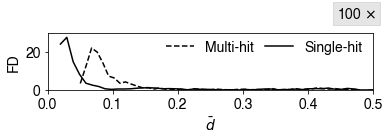

In [16]:
nrows, ncols = 1, 1
h, w = 2.032, 5.828
fig = plt.figure(figsize = (w, h))
# fig = plt.figure(figsize = (8.234,4.149))

gspec = fig.add_gridspec( nrows, ncols,
                          width_ratios  = [1],
                          height_ratios = [1],
                        )
ax_list = [ fig.add_subplot(gspec[i, 0]) for i in range(nrows) ]


# Upper panel - Accuracy...
ax = ax_list[0]

hy, hx = np.histogram(mean_support_val_dict1[1].numpy().reshape(-1), bins = 50, density = True)
ax.plot(hx[:-1], hy, '-', color = "black", label = "Single-hit")

hy, hx = np.histogram(mean_support_val_dict1[2].numpy().reshape(-1), bins = 50, density = True)
ax.plot(hx[:-1], hy, '--', color = "black", label = "Multi-hit")

ax.set_ylabel('FD')
ax.set_xlabel(r'$\bar{d}$')
ax.legend(bbox_to_anchor=(0.63, 0.60), loc='center', bbox_transform=fig.transFigure, frameon=False, ncol=2, mode="expand", borderaxespad=0.)
# ax.set_xlim((0.1 - 0.08, 1.2))
ax.set_xlim((0.0, 0.5))
ax.set_ylim((0.0, 30))
# ax.set_yticks(np.arange(0.4, 1.0+0.1, 0.1))
# ax.grid(True, linestyle = '--')
ax.set_box_aspect((h/2)/w)    # height/width

# for ticklabel in ax.xaxis.get_ticklabels():
#     ticklabel.set_visible(False)

offset = transforms.ScaledTranslation(-0.5, 0.6, fig.dpi_scale_trans)
ax.text(1.0, 0.5, rf"{photon_scale} $\times$", transform = ax.transAxes + offset, bbox=dict(facecolor='black', alpha=0.1))

In [ ]:
# [USER] Define the filename...
filename = f'Figure.hist_mean_dist.{pdb}.scale_{photon_scale}'

# Set up drc...
DRCPDF         = "pdfs"
drc_cwd        = os.getcwd()
prefixpath_pdf = os.path.join(drc_cwd, DRCPDF)
if not os.path.exists(prefixpath_pdf): os.makedirs(prefixpath_pdf)

# Specify file...
fl_pdf = f"{filename}.pdf"
path_pdf = os.path.join(prefixpath_pdf, fl_pdf)

# Export...
fig.savefig(path_pdf, dpi = 300)